In [2]:
!pip install tweepy
!pip install selenium

# Extract reviews of any product from ecommerce website like snapdeal and amazon___
Perform sentimental analysis___

In [4]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kitan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kitan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kitan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
oneplus_reviews=[]

In [8]:
for i in range (2,20):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [9]:
oneplus_reviews = list(set(oneplus_reviews))


In [10]:
oneplus_reviews

['\nIts a fantastic phone. i purchased this phone in august 2020. yes, you read it right i.e after the launch of the oneplus 8 and the oneplus Nord.The phone which truely stands out at this price point. hats off to Oneplus for making this amazing phone. it has almost everything that you can  think of . from ultra fast snapdragon 855+ to stereo speakers. if you wanna buy phone at this price point then go for it.let me cover something in detail:>>if you\'re having budget of 42k and you\'re going to buy ONEPLUS 8 then following things that you should consider-1.at a price point of 42k,you\'re getting a 6+128 GB varient, which is pretty expansive in my opinion.2. at this much price point, you\'re getting 48+16+2 MP camera - believe me or not, the 2MP camera is a scam and serves no purpose.3.Telephoto lens- which is capable of providing lossless 2x zoom is absent in oneplus 8.4. the 48MP camera is F/1.75 6-piece lens.all these things are making a phone really half-cooked in my opinion. and 

In [11]:
txt_upd = ' '.join(oneplus_reviews)
txt_upd

'\nIts a fantastic phone. i purchased this phone in august 2020. yes, you read it right i.e after the launch of the oneplus 8 and the oneplus Nord.The phone which truely stands out at this price point. hats off to Oneplus for making this amazing phone. it has almost everything that you can  think of . from ultra fast snapdragon 855+ to stereo speakers. if you wanna buy phone at this price point then go for it.let me cover something in detail:>>if you\'re having budget of 42k and you\'re going to buy ONEPLUS 8 then following things that you should consider-1.at a price point of 42k,you\'re getting a 6+128 GB varient, which is pretty expansive in my opinion.2. at this much price point, you\'re getting 48+16+2 MP camera - believe me or not, the 2MP camera is a scam and serves no purpose.3.Telephoto lens- which is capable of providing lossless 2x zoom is absent in oneplus 8.4. the 48MP camera is F/1.75 6-piece lens.all these things are making a phone really half-cooked in my opinion. and i

In [12]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [13]:
text_tokens = word_tokenize(txt_upd)

In [14]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [15]:
tf = TfidfVectorizer()

In [16]:
text_tf = tf.fit_transform(tokens_without_sw)

In [17]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\Users\kitan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
df

,aah,absence,absent,absolutely,accepting,accessed,accidental,accuracy,accurate,activate,...,worried,worry,worst,xs,year,years,yellowish,youtube,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
word_list = ' '.join(df)

In [20]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

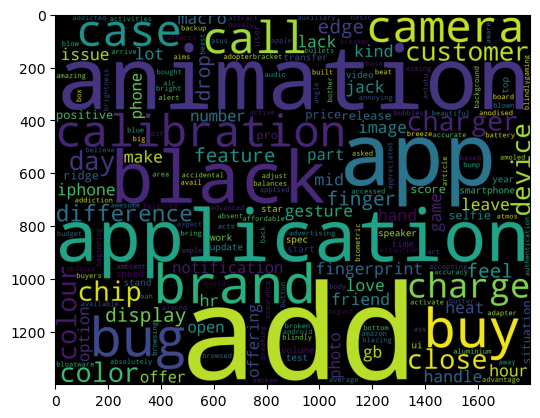

In [21]:
plt.imshow(wordcloud)

In [22]:
with open("positive-words.txt") as pw:
    positive_words = pw.read().split("\n")

In [23]:
positive_words = positive_words[35:]

In [24]:
with open("negative-words.txt", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [25]:
negative_words = negative_words[35:]

In [26]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [27]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [28]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [29]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

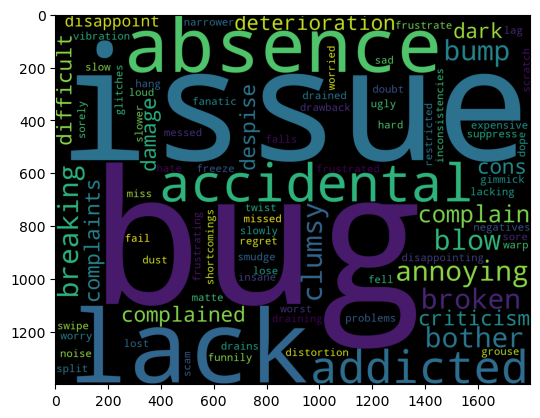

In [30]:
plt.imshow(wordcloud_neg)

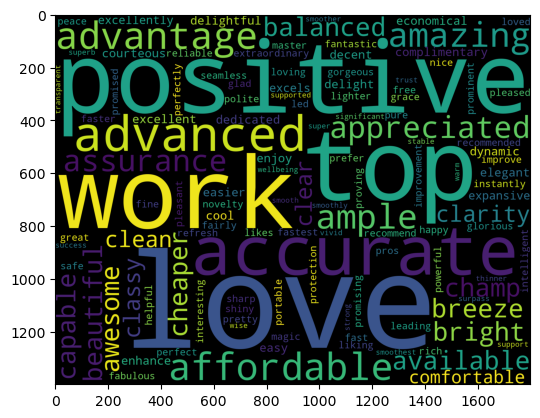

In [31]:
plt.imshow(wordcloud_pos)